# Problem Statement

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas_profiling
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
def compiledata():
    
    month = ['January','February','March','April','May','June','July','August','September','October','November','December']
    temp = pd.read_csv("Sales_January_2019.csv")
    
    data = pd.DataFrame(columns=temp.columns)
    for i in month:
        temporary = pd.read_csv(f'Sales_{i}_2019.csv')
        
        data = data.append(temporary)
    
    return data

In [4]:
daata = compiledata()

In [5]:
daata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
len(daata)

186850

In [7]:
daata.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
daata.dropna(inplace=True)

In [9]:
daata.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
daata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [11]:
daata['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [12]:
daata['Quantity Ordered'] = daata['Quantity Ordered'].replace("Quantity Ordered",daata['Quantity Ordered'].mode()[0])

In [13]:
daata['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [14]:
daata['Quantity Ordered'] = daata['Quantity Ordered'].astype(int)

In [15]:
daata['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [16]:
daata['Price Each'].mode()[0]

'11.95'

In [17]:
daata['Price Each'] = daata['Price Each'].replace('Price Each',daata['Price Each'].mode()[0])


In [18]:
daata['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [19]:
daata['Price Each'] = daata['Price Each'].astype(float)

In [20]:
daata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  int32  
 3   Price Each        186305 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.2+ MB


In [21]:
daata=daata.rename(columns={'Quantity Ordered':'Quantity'},inplace=False)
daata=daata.rename(columns={'Price Each':'Price'},inplace=False)
daata=daata.rename(columns={'Purchase Address':'address'},inplace=False)
daata=daata.rename(columns={'Order ID':'Order_ID'},inplace=False)
daata=daata.rename(columns={'Order Date':'Order_Date'},inplace=False)


In [22]:
daata[['city','state','pin']]=daata.address.str.split(',' ,expand=True)

In [23]:
daata = daata.drop('address' , axis=1)

In [24]:
daata.head()

,Order_ID,Product,Quantity,Price,Order_Date,city,state,pin
0,141234,iPhone,1,700.00,01/22/19 21:25,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,387 10th St,Austin,TX 73301


# Questions

Quantity of product sales state wise? 

In [25]:
daata.groupby(['Product','state']).sum()["Quantity"]

Product       state         
20in Monitor   Atlanta           342
               Austin            230
               Boston            394
               Dallas            343
               Los Angeles       658
                                ... 
iPhone         Los Angeles      1118
               New York City     881
               Portland          450
               San Francisco    1661
               Seattle           546
Name: Quantity, Length: 171, dtype: int32

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

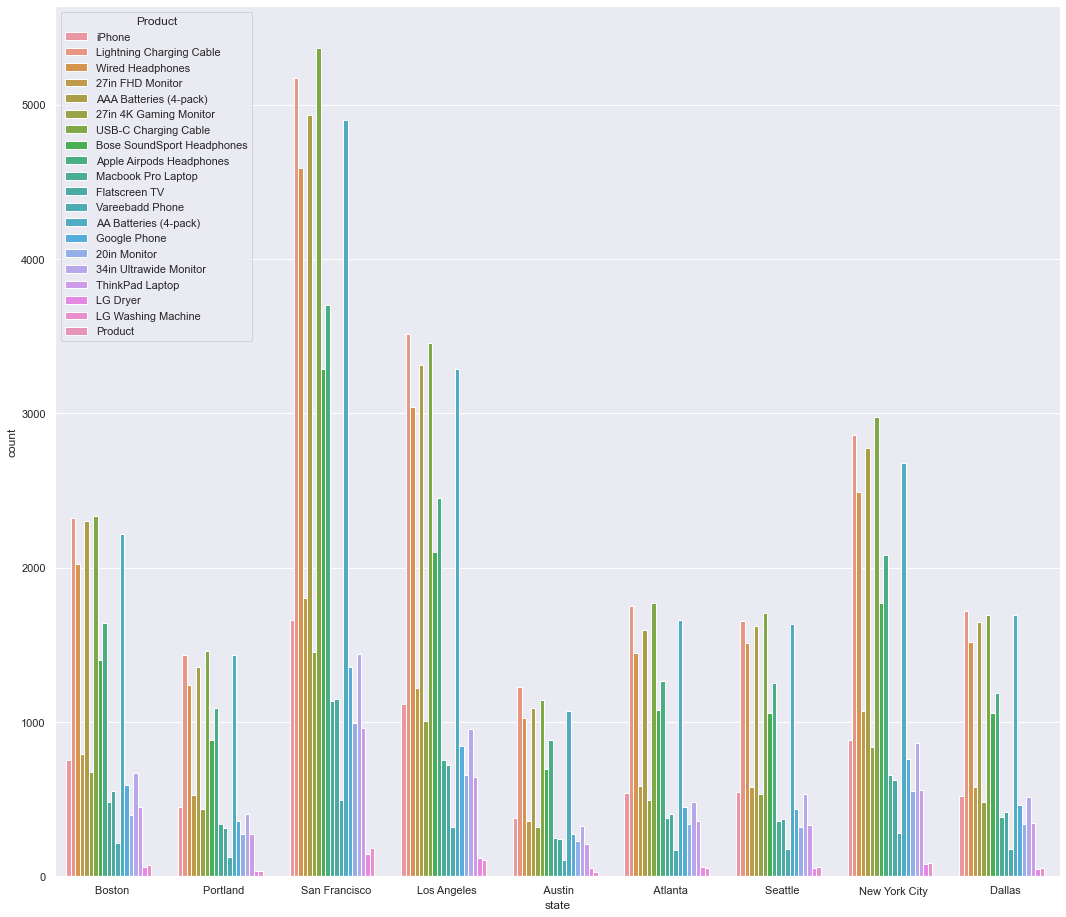

In [33]:
sns.countplot('state',data=daata,hue='Product')

From the above we can see maximum orders are placed in San Francisco, Los Angelesand New York City

the above data shows that LG Dryer and LG Washing Machine is less selling product in every city

the above shows that leaat selling state of year 2019 was Austin. 

# QUESTION

In [ ]:
Which product sells highest in quantity

In [26]:
df3=daata.groupby('Product').agg({'Quantity':'sum'})

In [27]:
df3

,Quantity
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


<AxesSubplot:ylabel='Product'>

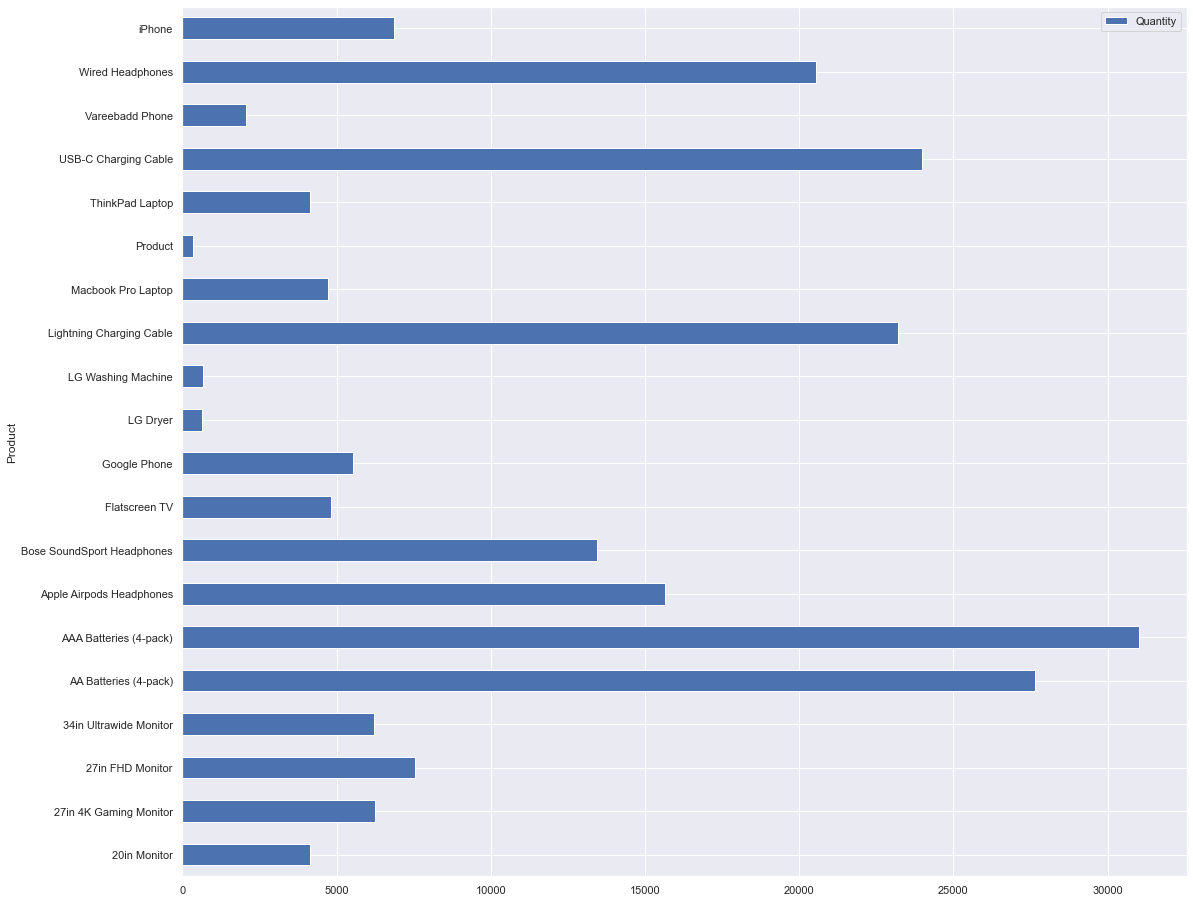

In [53]:
df3.plot.barh()

In [36]:
daata["orderprice"]=daata["Quantity"]*daata["Price"]

In [37]:
daata

,Order_ID,Product,Quantity,Price,Order_Date,city,state,pin,orderprice
0,141234,iPhone,1,700.00,01/22/19 21:25,944 Walnut St,Boston,MA 02215,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,185 Maple St,Portland,OR 97035,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,538 Adams St,San Francisco,CA 94016,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,738 10th St,Los Angeles,CA 90001,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,387 10th St,Austin,TX 73301,11.99
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,14 Madison St,San Francisco,CA 94016,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,549 Willow St,Los Angeles,CA 90001,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,273 Wilson St,Seattle,WA 98101,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,778 River St,Dallas,TX 75001,11.99


# QUESTION

which Product generate highest sales revenue 

In [38]:
daata

,Order_ID,Product,Quantity,Price,Order_Date,city,state,pin,orderprice
0,141234,iPhone,1,700.00,01/22/19 21:25,944 Walnut St,Boston,MA 02215,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,185 Maple St,Portland,OR 97035,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,538 Adams St,San Francisco,CA 94016,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,738 10th St,Los Angeles,CA 90001,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,387 10th St,Austin,TX 73301,11.99
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,14 Madison St,San Francisco,CA 94016,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,549 Willow St,Los Angeles,CA 90001,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,273 Wilson St,Seattle,WA 98101,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,778 River St,Dallas,TX 75001,11.99


In [39]:
df5=daata.groupby('Product')['orderprice'].sum()

In [40]:
df5

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
Product                          4242.25
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: orderprice, dtype: float64

<AxesSubplot:ylabel='Product'>

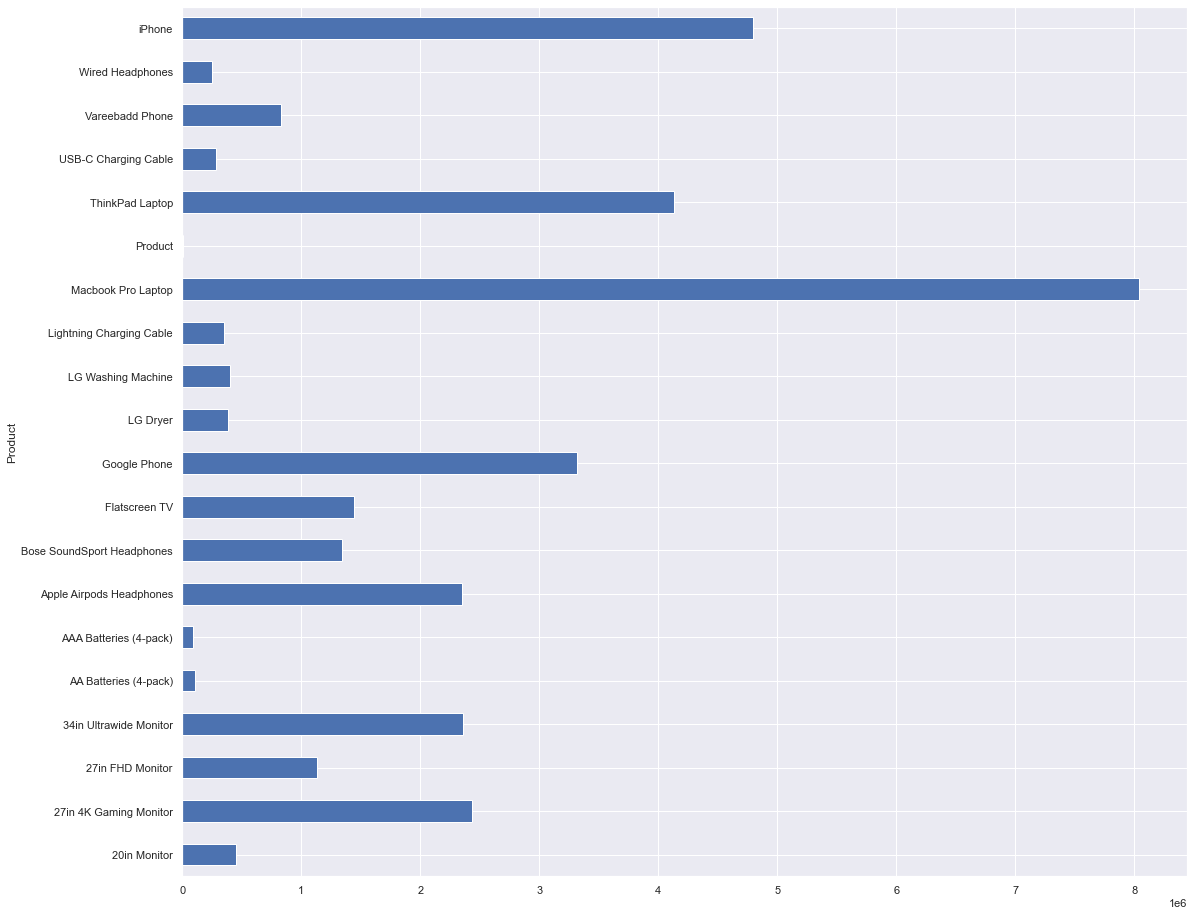

In [52]:
df5.plot.barh()

# QUESTION

Does price affect sales?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Price', ylabel='Quantity'>

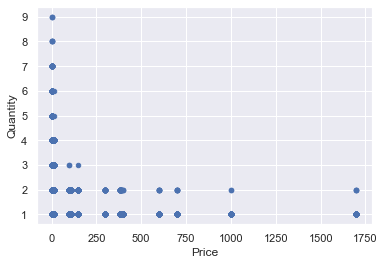

In [46]:
daata.plot.scatter(x='Price', y='Quantity')

In [ ]:
From the above we can the lower the price Quantity is higher.
With increasing in price Quantity of order decreases.


# CONCLUSIONS

Amazone 2019 sales data helps us in deducting that maximum orders was placed by Big states like San Francisco ,Los Angles and NYC 

maximum orders was placed only for Battries and wired headphone 

In 2019 highest revenue genertating products was laptop macbook pro,iphone and thinkpad laptop

More than 50% pepole are intrested in buying cheap products 

LG washing maching and LG dryer are least selling product of the year 2019

According to state Austine and Portland order least product in 2019